In [56]:
import numpy as np
from numpy.polynomial import polynomial as P
from matplotlib import pyplot as plt

In [57]:
def white_noise(number, variance):
    noise = np.random.normal(loc=0.0, scale=variance, size=number)
    return noise

def create_points(number):
    return np.linspace(start=0.0, stop=2.0, num=number)

def create_distribution(x, polynomial_degree, theta, noise):
    y = 0
    for i in range(polynomial_degree + 1):
        y += theta[i] * (np.power(x, i))
    y += noise
    return y

In [58]:
noise = white_noise(20, 0.1)
noise

array([-0.00175796,  0.03211671,  0.18298096,  0.15578465,  0.02923027,
        0.01094503,  0.00865403,  0.06524079,  0.05714951, -0.09406632,
        0.12353641, -0.01072502,  0.05501833, -0.13429766, -0.11255031,
       -0.05050882, -0.0555196 , -0.04861767, -0.08435324,  0.11901866])

In [59]:
x = create_points(20)
x

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [60]:
theta = np.array([0.2, -1.0, 0.9, 0.7, 0.0, -0.2])
y = create_distribution(x, 5, theta, noise)
y

array([0.19824204, 0.13763971, 0.21879269, 0.15116181, 0.01734019,
       0.02791519, 0.09233137, 0.25364093, 0.38659571, 0.4088857 ,
       0.8261092 , 0.90844719, 1.19553064, 1.21664566, 1.41854316,
       1.60705002, 1.64707363, 1.58518025, 1.32945832, 1.11901866])

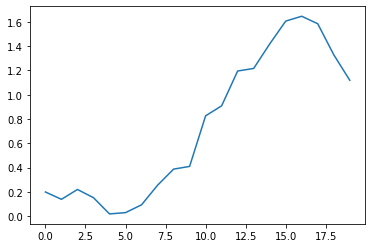

In [61]:
plt.plot(y)

In [62]:
least_squares_vector = np.polyfit(x, y, 5)
least_squares_vector

array([ 0.46423801, -3.22489357,  6.37073663, -3.45968956,  0.2650796 ,
        0.19350876])

In [63]:
def mse(y, x):
    return np.square(np.subtract(y, x)).mean()

In [116]:
train_set = np.random.uniform(low = 0.0, high = 2.0, size = (20, ))
mse_train = mse(y, train_set)
mse_train

0.8188053785396819

In [117]:
test_set = np.random.uniform(low = 0.0, high = 2.0, size = (1000, ))
mse_test = mse(y, test_set)
mse_test

ValueError: operands could not be broadcast together with shapes (20,) (1000,) 